## HW1：绪论（ddl：9.21）
你的名字：寇皓

你的学号：2300011467


注意：
1. 请使用 Python 语言完成所有编程作业。
2. 允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接复制粘贴由人工智能生成的代码。
3. 请直接在题干后附加代码块和必要的公式，讨论等。
4. 作图请包含 X,Y 轴的标签，以及必要的图例。过多信息的缺失可能会导致丢分。

作业只需要在这个 jupyter notebook 里添加代码，并直接提交修改后的 jupyter notebook，文件请重命名为`姓名-学号-作业x`。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程；另外标注**致谢**，借助了**哪位同学或 ChatGPT 等工具**的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！


### 1.伪随机数生成器与Marsaglia效应
<font color='red'>**本题可以调包**</font>

在计算物理中，随机性算法（如蒙特卡洛方法）扮演着至关重要的角色 。这类算法的可靠性高度依赖于其核心——伪随机数生成器的质量。一个高质量的生成器应产生周期长、关联性低的序列，以尽可能地模拟真实的随机过程 。然而，历史上一些算法存在严重缺陷，其中最著名的便是Marsaglia效应：在特定维度下，生成的随机点并非均匀分布于空间，而是坍缩到少数几个超平面上 。本作业将引导你亲手实现两种不同的线性同余发生器（LCG），复现其中的Marsaglia效应，并与现代高质量的随机数生成器进行对比。
    
#### **1.实现一个“臭名昭著”的LCG：RANDU**

讲义中提到，线性同余发生器（LCG）曾是主流的伪随机数生成算法 。其迭代公式为：
   
   $$I_{n+1} = (aI_n+c) (\text{mod}~m)$$

历史上，IBM的科学计算库中使用过一个著名的LCG实现，名为RANDU，其参数为$a=65539$, $c=0$, $m=2^{31}$。该生成器因其严重的缺陷而成为教科书式的反面案例 。

要求：

* 编写一个函数，实现RANDU生成器。该函数以种子seed和需要生成的随机数数量N为输入。

* 为使生成的数分布在[0, 1)区间，请将得到的每个整数$I_n$除以$m$。

* 生成至少100000个[0, 1)之间的伪随机数并保存下来。

In [1]:
import numpy
import matplotlib.pyplot as plt

def randu_random(seed: int, num: int):
    a: int = 65539
    m: int = pow(2, 31)
    randoms_int = numpy.empty([num], dtype=numpy.int64)
    randoms_int[0] = a * seed % m
    for i in range(1, num):
        randoms_int[i] = a * randoms_int[i - 1] % m
    randoms = numpy.empty([num], dtype=float)
    randoms = randoms_int / m
    return randoms


generate_number = 100000
randoms = randu_random(114514, generate_number)

#### **2.可视化RANDU的Marsaglia效应**

Marsaglia效应指出，将伪随机数序列中相邻的D个数作为D维空间中的点时，这些点可能并非充满整个空间，而是分布在若干平行的超平面上。

要求：

* 二维检验：将你用RANDU生成的序列中相邻的两个数$(x_i, y_i)=(u_i, u_{i+1})$作为二维平面上的点，绘制散点图。

* 三维检验：将序列中相邻的三个数$(x_i,y_i,z_i)=(u_i,u_{i+1},u_{i+2})$ 作为三维空间中的点，绘制三维散点图。请旋转观察你绘制的三维点图，从不同视角观察点的分布。Hint：可以使用`ax.view_init(elev=theta, azim=theta)`来旋转坐标系,请保留你发现特征的视角。

* 根据你的观察，RANDU生成的随机数是否存在Marsaglia效应？请用文字描述你在二维图和三维图中看到的结构。

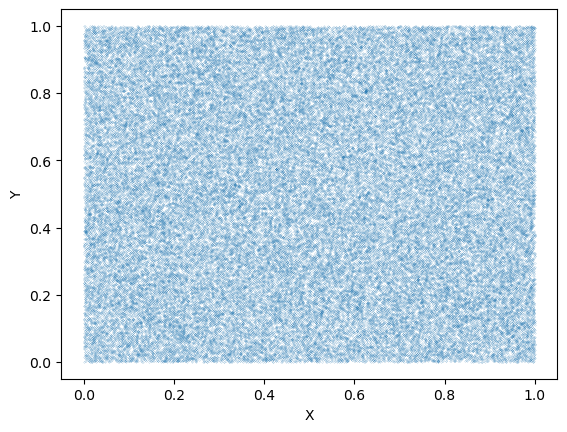

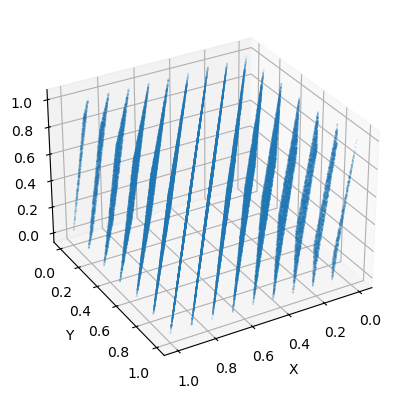

In [2]:
plt.figure()
plt.scatter(randoms[:-1], randoms[1:], s=0.01)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

figure = plt.figure()
plot3D = figure.add_subplot(111, projection="3d")
plot3D.scatter3D(randoms[:-2], randoms[1:-1], randoms[2:], s=0.01)
plot3D.view_init(elev=30, azim=60)
plot3D.set_xlabel("X")
plot3D.set_ylabel("Y")
plot3D.set_zlabel("Z")
plt.show()

<div style="border: 2px solid black; padding: 10px;">发现在二维情况下，RANDU算法得到的随机数产生的数对看起来比较随机且较为均匀；但是在三维情况下就会出现明显的Marsaglia效应，三维的数对只落在少数几个平面上（看起来是15个），显然RANDU的随机是存在很大问题的。
</di的。

#### **3.实现一个参数更优的LCG**

LCG算法本身并非一无是处，其表现高度依赖于参数$a,~c,~m$的选取。一个精心选择参数的LCG可以表现得相当不错。例如，在很多C语言的库（如glibc）中曾使用过的LCG参数为：$a=1103515245$, $c=12345$, $m=2^{31}$。

要求：

* 编写一个新的函数实现该参数更优的LCG。

* 生成同样数量的[0, 1)区间的伪随机数。

* 重复问题2中的三维可视化检验，并与RANDU的结果进行初步对比。这个LCG是否还存在肉眼可见的平面结构？

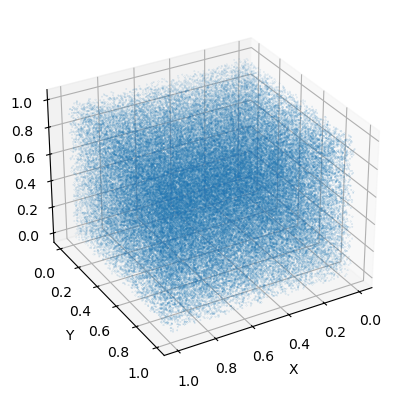

In [3]:
def glibc_random(seed: int, num: int):
    a: int = 1103515245
    c: int = 12345
    m: int = pow(2, 31)
    randoms_int = numpy.empty([num], numpy.int64)
    randoms_int[0] = (a * seed + c) % m
    for i in range(1, num):
        randoms_int[i] = (a * randoms_int[i - 1] + c) % m
    randoms = numpy.empty([num], dtype=float)
    randoms = randoms_int / m
    return randoms
glibc_randoms = glibc_random(114514, generate_number)
figure = plt.figure()
plot3D = figure.add_subplot(111, projection="3d")
plot3D.scatter3D(glibc_randoms[:-2], glibc_randoms[1:-1], glibc_randoms[2:], s=0.01)
plot3D.view_init(elev=30, azim=60)
plot3D.set_xlabel("X")
plot3D.set_ylabel("Y")
plot3D.set_zlabel("Z")
plt.show()

<div style="border: 2px solid black; padding: 10px;">
使用glibc的算法时，三维检验下肉眼看不到可见的平面结构。
</div>

#### **4.与现代随机数生成器对比**

现代编程语言Python中内置了质量更高的伪随机数生成算法，即讲义中提到的梅森旋转算法（Mersenne Twister），它具有极长的周期并且能有效规避Marsaglia效应 。

要求：

* 使用Python中Numpy的random库内置的函数，生成同样数量的[0, 1)区间的伪随机数。

* 再次进行三维可视化检验。

* 现在请你比较RANDU、参数更优的LCG、以及梅森旋转算法的三维散点图。请描述三者在随机点的空间均匀性上表现出的差异。

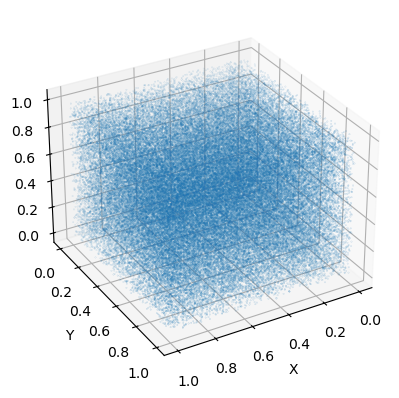

In [4]:
numpy_randoms = numpy.random.rand(generate_number)
figure = plt.figure()
plot3D = figure.add_subplot(111, projection="3d")
plot3D.scatter3D(numpy_randoms[:-2], numpy_randoms[1:-1], numpy_randoms[2:], s=0.01)
plot3D.view_init(elev=30, azim=60)
plot3D.set_xlabel("X")
plot3D.set_ylabel("Y")
plot3D.set_zlabel("Z")
plt.show()

<div style="border: 2px solid black; padding: 10px;">
RANDU的三维散点图在空间上的分布不随机也不均匀，其确定地在某个（某簇）平面上；而参数更优的LCG和梅森旋转算法的三维散点图则在空间上比较均匀。
</div>

#### **5.思考与讨论**

一个存在严重缺陷的伪随机数生成器，会对计算物理的模拟工作造成怎样的影响？

<div style="border: 2px solid black; padding: 10px;">
这会导致看起来随机的采样实际上是不随机、有规律的。这会导致对某些区域过度采样，而某些区域采样不足，使得结果偏离实际，更接近采样区域（或高密度采样区域）的信息。比如，假如想通过随机算法来估计一个三维空间下，某个曲面包裹的体积，如果使用RANDU算法生成的临近三个随机数作为空间坐标，显然会出现问题，得到错误的结果。
</div>

### 2.三次样条插值法及其性能分析
<font color='red'>**本题禁止调用**</font>`numpy.linalg.solve`, `scipy.interpolate.CubicSpline`等直接实现线性方程组求解和三次样条插值的库

在许多物理系统中，如RLC电路、阻尼摆中，我们都会观测到阻尼振荡信号。这类信号通常包含一个振荡项和一个随时间衰减的振幅包络。
我们现在需要分析的信号模型如下：
$$f(t) = e^{-0.8t} \cdot \cos(10t)$$
这个函数描述了一个振幅按指数 $e^{-0.8t}$ 衰减，并以角频率 $\omega=10$ 快速振荡的信号。由于实验设备的限制，我们的采样频率不够高，只在 $t \in [0, 2.75]$ 的时间区间内采集了 **12 个数据点**。你的任务是评估不同插值方法在这种“欠采样”情况下的表现。

**已知数据:**
从 $f(t)$ 函数上均匀采集了以下 **12 个数据点**：

| 时间 t | 信号 f(t) |
| :----: | :---------: |
|  0.00  |  1.00000    |
|  0.25  | -0.65592   |
|  0.50  |  0.19014    |
|  0.75  |  0.19024    |
|  1.00  | -0.37702    |
|  1.25  |  0.36707    |
|  1.50  | -0.22881    |
|  1.75  | 0.05411    |
|  2.00  |  0.08239    |
|  2.25  | -0.14436    |
|  2.50  |  0.13414    |
|  2.75  |  -0.07921    |

边界条件为$f^\prime(0)=-0.8$, $f^\prime(2.75)=-0.7114$




#### **1.实现高斯消元法求解器**
要求:
*  编写一个名为 `solve_linear_system(A, b)` 的 Python 函数，该函数接收一个 $n \times n$ 的系数矩阵 `A` 和一个 $n$ 维的常数向量 `b`，返回方程组 $A\vec{x} = \vec{b}$ 的解 $\vec{x}$。
* 使用**高斯消元法 (Gauss Elimination)** 实现。为了保证算法的数值稳定性，可以加入**部分支点遴选 (Partial Pivoting)** 策略，即在每一消元步骤中，交换当前列绝对值最大的元素所在行作为主行










In [5]:
def solve_linear_system(A: numpy.ndarray, b: numpy.ndarray):
    if b.size == 0:
        return numpy.array([])
    exchange_row = 0
    # 部分支点遴选
    for i in range(1, b.size):
        if abs(A[i][0]) > abs(A[exchange_row][0]):
            exchange_row = i
    for i in range(b.size):
        A[exchange_row][i], A[0][i] = A[0][i], A[exchange_row][i]
    b[exchange_row], b[0] = b[0], b[exchange_row]
    # 消元
    for i in range(1, b.size):
        coef = -A[i][0] / A[0][0]
        A[i][0] = 0
        b[i] += b[0] * coef
        for j in range(1, b.size):
            A[i][j] += A[0][j] * coef
    # 迭代并求解第一行值
    sub_solve: numpy.ndarray = solve_linear_system(A[1:, 1:], b[1:])
    first_solve = (b[0] - (A[0, 1:] * sub_solve).sum()) / A[0][0]
    solve = numpy.hstack((first_solve, sub_solve))
    return solve

#### **2.构建全局高次多项式插值**

* 构造一个唯一的11次多项式 $f_{11}(t) = \sum_{i=0}^{11} c_i t^i$ 使其穿过所有12个数据点。这需要求解一个由范德蒙德 (Vandermonde) 矩阵构成的线性方程组 $A\vec{c} = \vec{f}$ 来确定系数 $\vec{c}=\{c_0, ..., c_{11}\}$。请自行构建该 $12 \times 12$ 的范德蒙德矩阵 $A$ 并使用你编写的线性方程组求解器求解。
* 在同一张图上绘制三条曲线：
    1.  你通过插值生成的平滑函数。
    2.  原始的 12 个离散数据点（用散点表示）。
    3.  精确的信号函数 $f(t)$ 曲线作为参考。

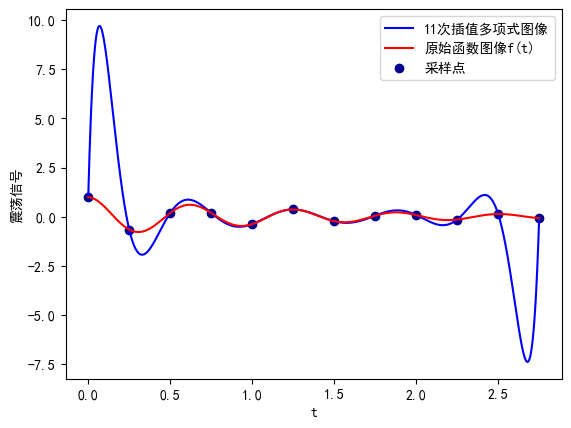

In [6]:
xs = numpy.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75])
ys = numpy.array(
    [
        1,
        -0.65592,
        0.19014,
        0.19024,
        -0.37702,
        0.36707,
        -0.22881,
        0.05411,
        0.08239,
        -0.14436,
        0.13414,
        -0.07921,
    ]
)

A = numpy.empty([xs.size, xs.size], dtype=float)
for i in range(xs.size):
    A[:, i] = numpy.power(xs, i)
b = ys.copy()
cs = solve_linear_system(A, b)

xs_plot = numpy.linspace(xs.min(), xs.max(), 20000)
ys_plot = numpy.zeros(xs_plot.size)
ys_exact_plot = numpy.exp(-0.8 * xs_plot) * numpy.cos(10 * xs_plot)
for i in range(xs.size):
    ys_plot += numpy.power(xs_plot, i) * cs[i]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(xs_plot, ys_plot, color='blue', label='11次插值多项式图像')
plt.plot(xs_plot, ys_exact_plot, color='red', label='原始函数图像f(t)')
plt.scatter(xs, ys, color='darkblue', label='采样点')
plt.xlabel('t')
plt.ylabel('震荡信号')
plt.legend()
plt.show()

#### **3.构建三次样条插值的线性方程组**

接下来，我们需要根据三次样条的理论，为给定的数据点构建线性方程组，以求解每个节点上的二阶导数值$M_i$（即“矩”，Moments）。

* 编写一个名为 `setup_spline_equations(t, f)` 的函数。该函数接收数据点的自变量数组 `t` 和因变量数组 `f`，返回求解 $M_i$ 所需的系数矩阵 `A` 和常数向量 `b`。
* 对于 $n+1$ 个数据点 $(t_j, f_j)$，方程组的形式如下：
    $$
    \frac{h_j}{6}M_{j-1} + \frac{h_j+h_{j+1}}{3}M_j + \frac{h_{j+1}}{6}M_{j+1} = \frac{f_{j+1}-f_j}{h_{j+1}} - \frac{f_j-f_{j-1}}{h_j}
    $$
    其中 $h_{j+1} = t_{j+1} - t_j$，该方程对内部节点 $j=1, ..., n-1$ 成立。
  除此之外根据边界条件还可以构造两个方程。



In [7]:
# setup_spline_equations 将返回不包含边界条件的 A 和 b, 即首行和末行的 A 和 b 为 0
def setup_spline_equations(t: numpy.ndarray, f: numpy.ndarray):
    A = numpy.zeros([t.size, t.size], dtype=float)
    b = numpy.zeros([t.size], dtype=float)
    h = numpy.zeros([t.size], dtype=float)
    for i in range(0, t.size - 1):
        h[i + 1] = t[i + 1] - t[i]
    for i in range(1, t.size - 1):
        A[i][i - 1] = h[i] / 6
        A[i][i] = (h[i] + h[i + 1]) / 3
        A[i][i + 1] = h[i + 1] / 6
        b[i] = (f[i + 1] - f[i]) / h[i + 1] - (f[i] - f[i - 1]) / h[i]
    return (A, b)

#### **4.实现高精度插值**

* 结合前两问，实现完整的 `cubic_spline_interpolation(t_points, f_points, f_p_start, f_p_end, eval_t)` 函数，输入分别表示$t$值，$f$值，$f$左侧导数，$f$右侧导数，具体时间点$t$。(或者用你喜欢的方式生成插值曲线)
* 在同一张图上绘制三条曲线：
    1.  你通过插值生成的平滑函数。
    2.  原始的 12 个离散数据点（用散点表示）。
    3.  精确的信号函数 $f(t)$ 曲线作为参考。

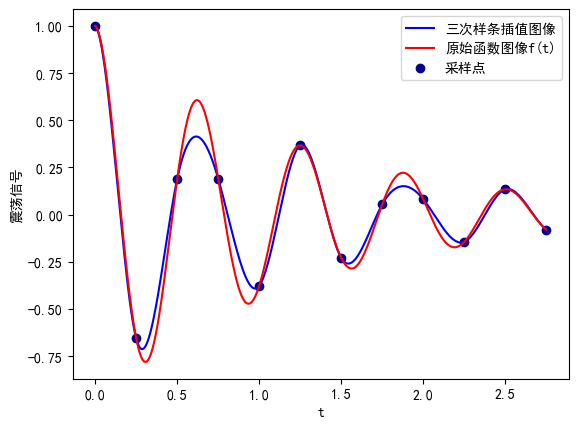

In [8]:
# 为避免重复计算, 此处仅得到一系列 M 值, 在 cubic_spline_interpolation 函数中再计算具体对应数值
def cubic_spline_interpolation_solveM(t_points: numpy.ndarray, f_points: numpy.ndarray, f_p_start: float, f_p_end: float):
    (A, b) = setup_spline_equations(t_points, f_points)
    # boundary condition at start
    A[0][0] = -(t_points[1] - t_points[0]) / 3
    A[0][1] = -(t_points[1] - t_points[0]) / 6
    b[0] = f_p_start - (f_points[1] - f_points[0]) / (t_points[1] - t_points[0])
    # boundary condition at end
    n = t_points.size - 1
    A[n][n - 1] = (t_points[n] - t_points[n - 1]) / 6
    A[n][n] = (t_points[n] - t_points[n - 1]) / 3
    b[n] = f_p_end - (f_points[n] - f_points[n - 1]) / (t_points[n] - t_points[n - 1])
    return solve_linear_system(A, b)


# 计算插值
def cubic_spline_interpolation(t_points: numpy.ndarray, f_points: numpy.ndarray, M: numpy.ndarray, t_eval: float):
    for i in range(t_points.size - 1):
        if t_points[i] <= t_eval <= t_points[i + 1]:
            hi1 = t_points[i + 1] - t_points[i]
            Ai = (f_points[i + 1] - f_points[i]) / hi1 - (M[i + 1] - M[i]) * hi1 / 6
            Bi = f_points[i] - M[i] * numpy.power(hi1, 2) / 6
            S = (M[i] * numpy.power(t_points[i + 1] - t_eval, 3) + M[i + 1] * numpy.power(t_eval - t_points[i], 3)) / (6 * hi1) + Ai * (t_eval - t_points[i]) + Bi
            return S
    return 0.0


M = cubic_spline_interpolation_solveM(xs, ys, -0.8, -0.7114)
ys_cubic_plot = numpy.fromiter(map(lambda x: cubic_spline_interpolation(xs, ys, M, x), xs_plot), dtype=float)
plt.plot(xs_plot, ys_cubic_plot, color='blue', label='三次样条插值图像')
plt.plot(xs_plot, ys_exact_plot, color='red', label='原始函数图像f(t)')
plt.scatter(xs, ys, color='darkblue', label='采样点')
plt.xlabel('t')
plt.ylabel('震荡信号')
plt.legend()
plt.show()

#### **5.误差分析（三次样条插值）:**
* 编写一个函数计算插值结果与真实函数值的**绝对误差** $|S(t) - f(t)|$。
* 绘制**误差曲线**，即绝对误差随 $t$ 变化的图像。
* 观察误差曲线，误差在哪个区间最大？为什么你认为在这些区域插值效果相对较差？（提示：与函数本身的形状和采样点疏密程度联系）

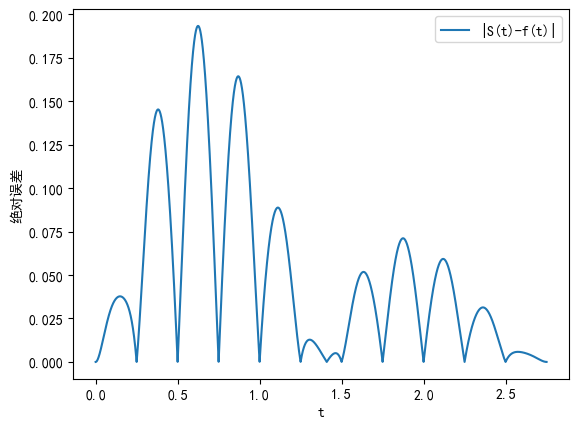

In [9]:
# 计算误差
def abs_diff(t_points: numpy.ndarray, f_points: numpy.ndarray, M: numpy.ndarray, t_eval: float):
    exact = numpy.exp(-0.8 * t_eval) * numpy.cos(10 * t_eval)
    interpolation = cubic_spline_interpolation(t_points, f_points, M, t_eval)
    return abs(exact - interpolation)


diff = numpy.fromiter(map(lambda x: abs_diff(xs, ys, M, x), xs_plot), dtype=float)
plt.plot(xs_plot, diff, label='|S(t)-f(t)|')
plt.xlabel('t')
plt.ylabel('绝对误差')
plt.legend()
plt.show()

<div style="border: 2px solid black; padding: 10px;">
插值函数在0.5~0.6这个范围内误差最大，在0.3~1.0之间的误差较大。插值效果较差应该是因为在这个区间内，函数值变化剧烈，样条曲线不能很好地“猜”出在临近的采样点之间，真正的函数值应当是多少；同时，我们设置的采样点比较稀疏，这也会导致在两采样点之间，插值效果不理想。
</div>

### 作业完成情况：

<div style="border: 2px solid black; padding: 10px;">
完成作业大约用了4~5小时，在完成作业的过程中使用了ChatGPT，尤其是画图环节中和numpy函数的具体使用方法（如构造函数的用法、hstack的用法等）上借助了ChatGPT的帮助。作业本身不算难，但是真正写代码实现起来还是比较复杂，需要注重细节。在随机数生成中，ndarray原则上不能声明为float类型，虽然一开始没注意（可能画出来的图也差不多），但是后来还是意识到float表示整数还是存在问题，会有精度限制。此外，代码做了一些性能的考量，但matplotlib的性能实在难蚌。另外有个建议，可以适当放开问题的实现方式。比如在问题2.5中，要求编写一个函数计算绝对误差，但是实际上我在实现前几问的时候，已经保存了原始函数的纵坐标值ys_exact_plot和样条插值得到的纵坐标值ys_cubic_plot，直接相减就可以得到误差。如果要更精细地画图的话，可以从一开始就修改xs_plot的大小，并且直接相减和单独开一个函数计算误差并不存在实质性的计算耗时差异（虽然存在存储空间差异）。我觉得新定义一个函数似乎还是绕了一下（没用到之前的结果，又算了一遍）。
</div>